
# Project: Investigate No-show appointments Dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
* ‘Neighborhood’ indicates the location of the hospital.</li>
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program "Bolsa Família".</li>
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>

We will try to understand What factors are important for us to know in order to predict if a patient will show up for their
scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Find the number of patients (rows) and their characteristics (columns)
df.shape

(110527, 14)

In [4]:
# inspect data types and look for instances of missing data.
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data

In [5]:
df.describe()  

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The mean of ages is 37 years.
* Maximum age is 115 years.
* There is probably a mistak with one of the patients' age. It shows -1 year, which does not make sense.


### Data Cleaning (Replace this with more specific notes!)

In [6]:
# We probably won't need the patient ID, Appointment ID, scheduled day, and appointment day in our data analysis, so we can drop them.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay' ], axis = 1, inplace=True )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Renaming the "No-show" column to facilitate analysis
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### A general look on the data

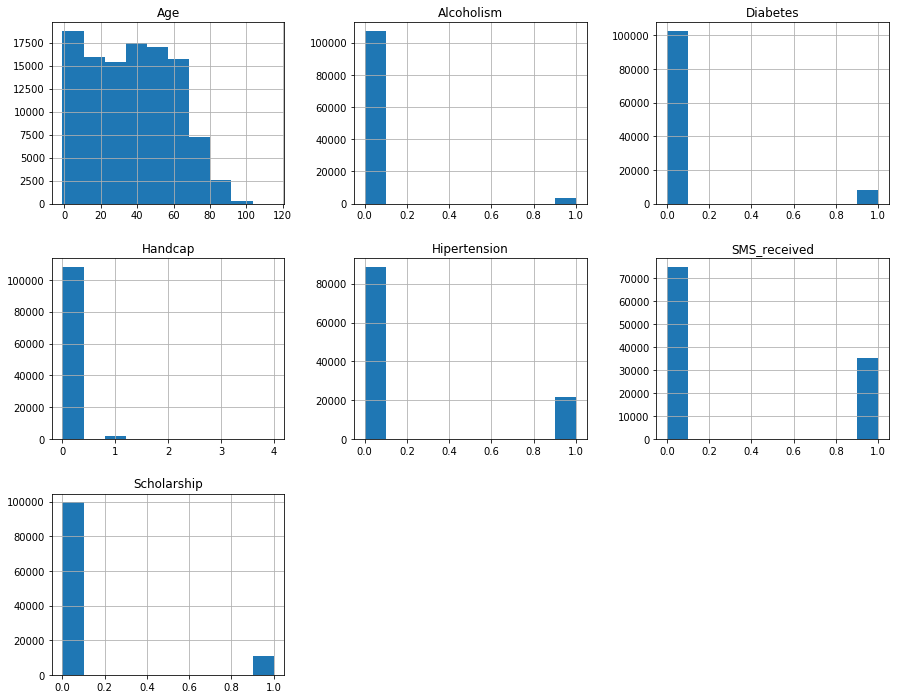

In [8]:
df.hist(figsize= (15,12));  #histogram of whole dataset

* Most of the patients didn't suffer from chronic diseases nor are handicapped.
* About 20% (20000 out of 100000) suffered from hypertension.
* About half of them received an SMS.
* About 10% are enrolled in the Brasilian welfare program.

In [9]:
# Assigning names to show and no show to facilitate recall and comparison
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

In [10]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hipertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [11]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hipertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

The number of those who showed at the clinic was about 4 times those who did not show.

### Analysing other characteristics

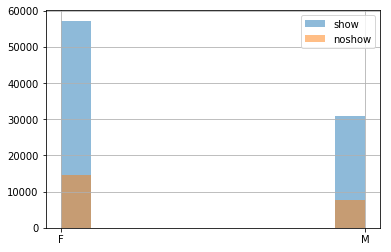

In [12]:
# Compare those who showed to those who didn't according to Gender.

df.Gender[show].hist(alpha = 0.5, label = 'show')
df.Gender[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

Gender is insignificant. Females who showed were more than males who did, and females who did not show were also more than males who did not.

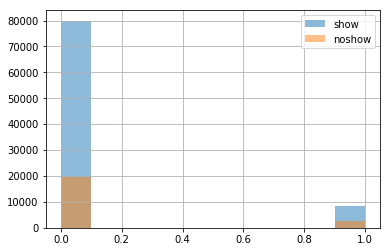

In [13]:
# Compare those who showed to those who didn't according to enrollment in the Brasilian welfare program.

df.Scholarship[show].hist(alpha = 0.5, label = 'show')
df.Scholarship[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

Being  enrolled in the Brasilian welfare program is insignificant

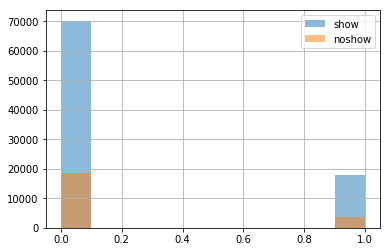

In [14]:
# Compare those who showed to those who didn't according to hypertension.

df.Hipertension[show].hist(alpha = 0.5, label = 'show')
df.Hipertension[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

Hypertension is insignificant

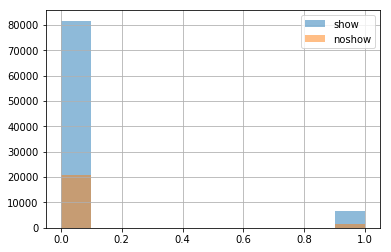

In [15]:
# Compare those who showed to those who didn't according to diabetes.

df.Diabetes[show].hist(alpha = 0.5, label = 'show')
df.Diabetes[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

Diabetes is insignificant

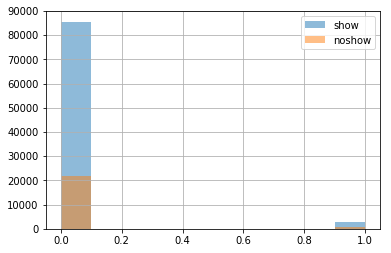

In [16]:
# Compare those who showed to those who didn't according to alcoholism.

df.Alcoholism[show].hist(alpha = 0.5, label = 'show')
df.Alcoholism[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

Alcoholism is insignificant

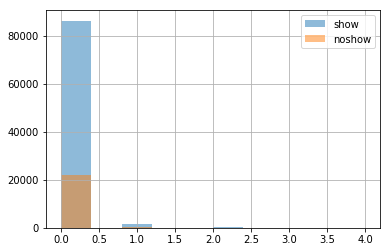

In [17]:
# Compare those who showed to those who didn't according to being handcapped.

df.Handcap[show].hist(alpha = 0.5, label = 'show')
df.Handcap[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

Handcap is insignificant

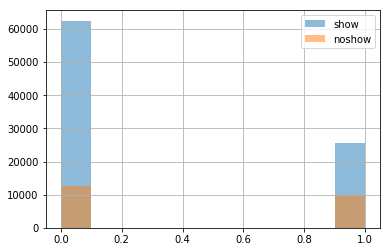

In [18]:
# Compare those who showed to those who didn't according to the SMS they received.

df.SMS_received[show].hist(alpha = 0.5, label = 'show')
df.SMS_received[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

It's a bit strange to see that more people showed without receiving an SMS!

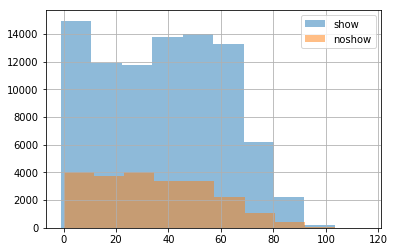

In [19]:
# Compare those who showed to those who didn't according to their age.

df.Age[show].hist(alpha = 0.5, label = 'show')
df.Age[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

* Patients in the age group 0-10 shwoed more than all the other age groups, followed by the age group 35-70.
* The older they get, the less they tend to get an appointment.


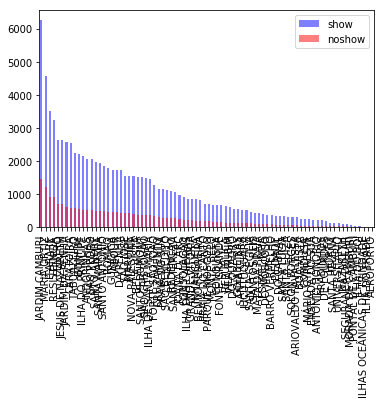

In [20]:
# Compare those who showed to those who didn't according to their neiborhood.
df.Neighbourhood[show].value_counts().plot (kind='bar', alpha=0.5, color='blue', label='show')
df.Neighbourhood[noshow].value_counts().plot (kind='bar', alpha=0.5, color='red', label='noshow')
plt.legend();

It seems that neiborhood is strongly affecting the showing of patients at the clinic.

<a id='conclusions'></a>
## Conclusions

* At the end, I can say that neighbourhood is strongly related to the patiens showing up at the clinic.
* Age also has it's role as those in the 0-10 age group were the most to show up, followed by the age group 35-70.
* Although it sounds strange, more people showed without receiving an SMS! 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0